In [49]:
w = wall[0]
dim = 3
sl = 5

bases = []
I = sl*np.eye(dim)
for d in range(dim):
    for s in [1,-1]:
        bases.append(I.copy())
        I[0] *= -1
    I = np.roll(I, -1, axis=0)
print(bases)
b = bases[0]
pos = -1*b[0]
x = np.array([-5,1,2])
dx = x-pos
onb = make_orth_norm_basis(b)
print(dx)
# print(onb)

b = np.arange(9).reshape(3,3)

l = np.diag(b.dot(b.T))
dx.dot(b)/l
# # print(b)
# l = b.dot(b.T)
# l

[array([[ 5.,  0.,  0.],
       [ 0.,  5.,  0.],
       [ 0.,  0.,  5.]]), array([[-5., -0., -0.],
       [ 0.,  5.,  0.],
       [ 0.,  0.,  5.]]), array([[ 0.,  5.,  0.],
       [ 0.,  0.,  5.],
       [ 5.,  0.,  0.]]), array([[-0., -5., -0.],
       [ 0.,  0.,  5.],
       [ 5.,  0.,  0.]]), array([[ 0.,  0.,  5.],
       [ 5.,  0.,  0.],
       [ 0.,  5.,  0.]]), array([[-0., -0., -5.],
       [ 5.,  0.,  0.],
       [ 0.,  5.,  0.]])]
[ 0.  1.  2.]
[  5  50 149]
[[  5  14  23]
 [ 14  50  86]
 [ 23  86 149]]


In [1]:
#setup 2D or 3D box
%run -i program/billiard_defs.py
%run -i program/analysis.py

dim = 2
pw_collision_law = 'no_slip'
# pw_collision_law = 'specular'
sl = 20

# Create orthonormal basis (onb) for each of the 6 faces, basis vectors down columns, normal rightmost
# Dynamics depend only on the normal, but visualization needs the full onb
names = ['x_min','x_max','y_min','y_max']
if dim == 3:
    names.extend(['z_min', 'z_max'])

onbs = []
I = np.eye(dim)
for d in range(dim):
    for s in [1,-1]:
        onbs.append(I.copy())
        I[0] *= -1
    I = np.roll(I, -1, axis=0)

# Create the wall objects
wall = []
for (name, onb) in zip(names, onbs):
    wall.append(FlatWall(pos=-sl*onb[:,-1], basis=onb, name=name, collision_law=pw_collision_law, half_length=sl))

bounding_box = np.array([[-sl,sl] for d in range(dim)])
lab_frame = np.eye(dim)  #desired frame for lab



# Used for visualization later
surface_data_dict = []
for w in wall:
    w.parametrize()
    data_dict = {
        'name': w.name,
        'x': w.param[0],
        'y': w.param[1],
    }
    if dim == 2:
        data_dict['type'] = 'scatter'
        data_dict['mode'] = 'lines'
        data_dict['line'] = dict(
            #color = ('rgb(205, 12, 24)'),
            color = 'black',
            width = 5)
    elif dim == 3:
        data_dict['type'] = 'surface'
        data_dict['opacity'] = 0.4
        data_dict['colorscale'] = [[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']]
        data_dict['showscale'] = False
        data_dict['z'] = w.param[2]
    surface_data_dict.append(data_dict)

In [2]:
# Setup particles

num_part = 5
mass = 7
gamma = 'uniform'  #parameter btw 0 mass at center) and sqrt(2/dim) (mass on outside shell)
radius = 1
temp = 10
pp_collision_law = 'no_slip'
# pp_collision_law = 'specular'

In [5]:
%run -i program/billiard_defs.py
%run -i program/analysis.py

max_steps = 8
max_distort = 50  # Used after experiment to determine whether to interpolate between collisions
# If so, how much distortion to allow.  Must be 0-100, smaller <-> more frames and smoother, but longer 
# processing and larger files.  Anything other than 0-100 will turn off smoothing
print(num_part)
try:
    step = 'init'
    np.random.seed(42)
    
    part = Particles(wall, num=num_part, mass=mass, gamma=gamma
                 ,radius=radius, temp=temp, collision_law=pp_collision_law
                 #,pos=[0,0,10]  # comment this line out for random init pos
                 #,vel=[1,0,0]  # comment this line out for random init vel
                 #,spin=[0,1,0]
                )
    init(wall, part)
    for step in range(max_steps):
        do_the_evolution()
except:
    error_report()
    
re_t, re_pos, re_vel, re_orient, re_spin = smoother(max_distort)
S, P, D, M = re_pos.shape

print("Finished it all.  There are {} frames in this animation of {} particles.".format(S, P))

5
[[ 16.32851079  11.70857442]
 [         inf          inf]
 [         inf          inf]
 [         inf          inf]
 [         inf          inf]]
An error occurred at step init.  Current state below.  (orientation may not be correct - computed after simulation completes)


NameError: name 'part' is not defined

In [5]:
%run -i program/analysis.py
fig = interactive_plotly()

using newer


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


<IPython.core.display.Javascript object>


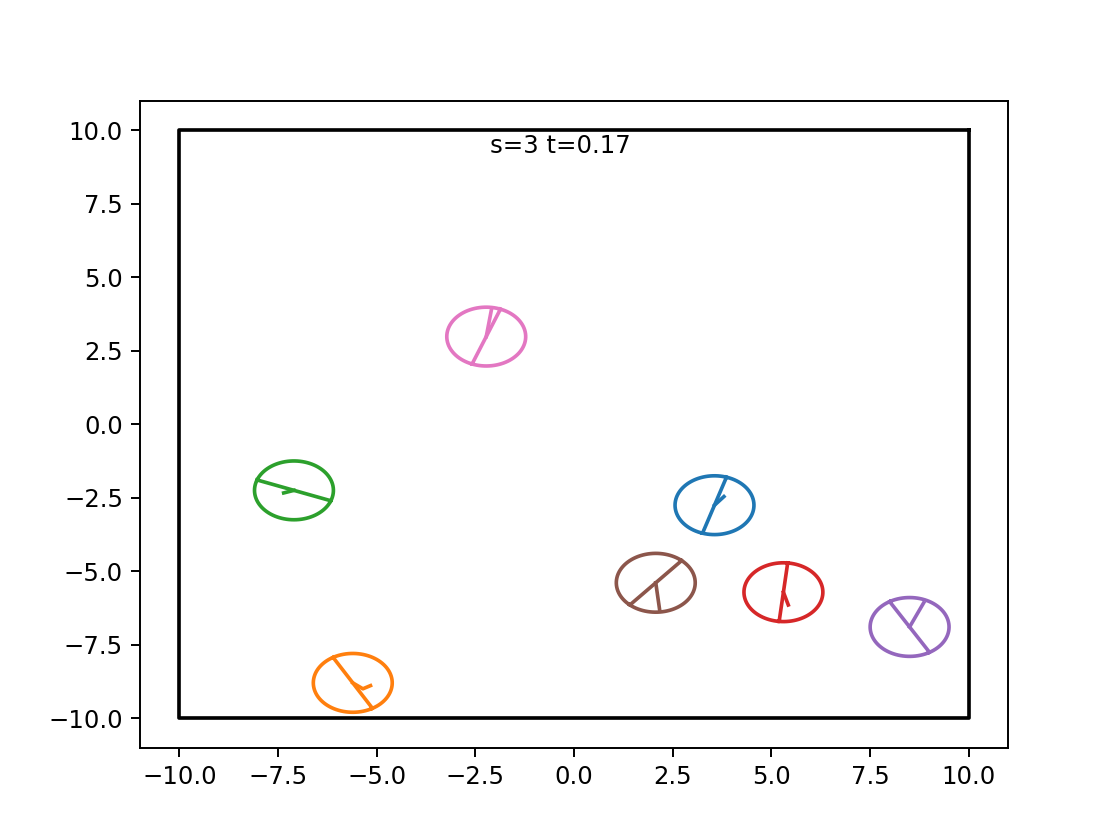

In [7]:
# animate 2D box
## This uses matplotlib funcanimate.  Must have FFMEG or equivalent installed
%run -i program/analysis.py

run_time = 10
%matplotlib notebook
S, P, D, M = re_pos.shape
anim = animate_2d_box(run_time)
display(anim)
anim.save('box_2D.mp4', fps= S/run_time, extra_args=['-vcodec', 'libx264']);